#TODO's: 
1. Set up a virtual enviorment (conda or .venv) -D
2. Set up the needed packages -D
3. Analize the Dataset
4. look for classification Algorithm
5. Preporcess Dataset
6. Make sure CUDA works
7. Train model with the goal of high recall (because it's a dataset that needs to detect attacks)
8. Look at the performance

In [1]:
#Check GPU
!nvidia-smi

Sun Dec 15 13:23:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              6W /   85W |      18MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#import the standard libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    precision_recall_curve,
    f1_score,
    make_scorer,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


Data Loading

In [6]:
# Load the dataset to df parameter
df = pd.read_csv('dataset_sdn.csv')

Data Analysis

In [8]:
# Basic information about the dataset
print("Dataset shape: ", df.shape) # rows - data, columns - features
print("\nClass Distribution:")
print(df['label'].value_counts(normalize=True)) # class distribution (0 - benign, 1 - malicious), how many % of each class

Dataset shape:  (104345, 23)

Class Distribution:
label
0    0.609143
1    0.390857
Name: proportion, dtype: float64


Visualization Of The Dataset

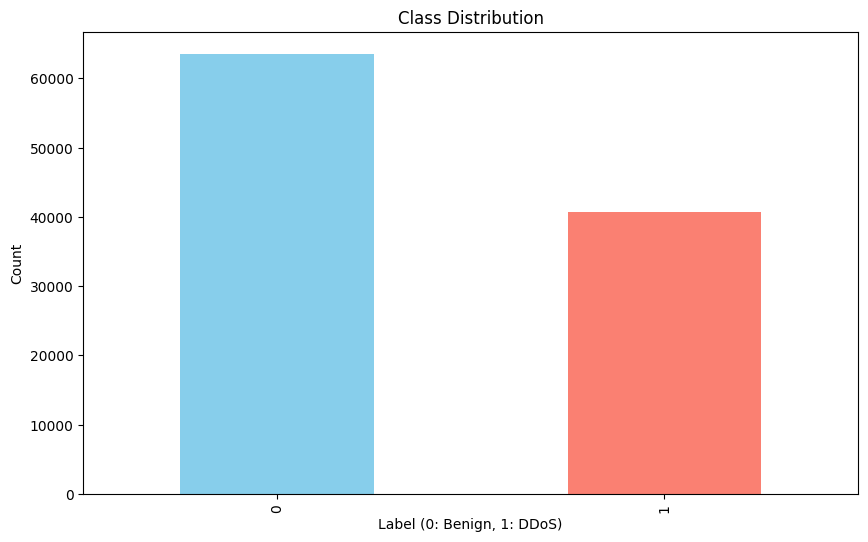

In [13]:
# Here we manually make a plot to show the class distribution
plt.figure(figsize=(10, 6)) # size of the plot
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon']) # bar plot
plt.title('Class Distribution') # title of the plot
plt.xlabel('Label (0: Benign, 1: DDoS)') 
plt.ylabel('Count') 
plt.show()